In [35]:
import numpy as np
import matplotlib.pyplot as plt
import operator

games={}
genres=set()
publishers=set()
years= set()
int_years = set()
bins = []
with open('dataset/games.csv', 'r', encoding = "ISO-8859-1") as ip:
    next(ip)
    for line in ip:
        line=line.strip()
        line=line.split(',')
        publishers.add(line[4])
        genres.add(line[3])
        years.add(line[2])
        if line[0] in games:
            games[line[0]].extend(line)
        else:
            games[line[0]] = line
        

print('Number of unique games', len(games.keys()))
print('Number of genres', len(genres))
print('Number of publishers', len(publishers))
print('Number of years of Data', len(years))

years.remove('N/A')

for year in years:
    int_years.add(int(year))

minimum = min(int_years) 
while(minimum < max(int_years)):
    bins.append((minimum,minimum + 4))
    minimum = minimum + 5

def create_data_for_bins(dic):
    new_dic = {}
    for key in dic:
        for b in bins:
            b_key = str(b[0])+'-' + str(b[1])
            if b[0] <= int(key)<= b[1]:
                if b_key not in new_dic:
                    new_dic[b_key] = 0.0
                new_dic[b_key] += dic[key]
            else:
                if b_key not in new_dic:
                    new_dic[b_key] = 0.0
                
    return new_dic

def plotGraph(NA, EU,JP,Other):
    clr = ['r','b','g','y','black']
    k = 0
    for publisher in sorted(NA):
        list_float_key = []
        list_float_val = []
        list_sorted_keys = []
        update_dic = create_data_for_bins(NA[publisher])
        list_float_key = range(0,len(update_dic))
        for keys in sorted(update_dic):
            list_sorted_keys.append(keys)
            list_float_val.append(update_dic[keys]/10)
        plt.figure(1, figsize=(11,7))
        plt.plot(list_float_key,list_float_val,color= clr[k], label=publisher)
        plt.ylabel('Sales (in 10 millions)')
        plt.xlabel('Years')
        plt.xticks(list_float_key,list_sorted_keys)
        plt.title('Trends in Sales/Year for top 5 Publishers(Overall) in North America')
        plt.legend(sorted(NA), loc= "upper left")
        k += 1
    k = 0 
    for publisher in sorted(EU):
        list_float_key = []
        list_float_val = []
        list_sorted_keys = []
        update_dic = create_data_for_bins(EU[publisher])
        list_float_key = range(0,len(update_dic))
        for keys in sorted(update_dic):
            list_sorted_keys.append(keys)
            list_float_val.append(update_dic[keys]/10)
        plt.figure(2, figsize=(11,7))
        plt.plot(list_float_key,list_float_val,color= clr[k], label=publisher)
        plt.ylabel('Sales (in 10 millions)')
        plt.xlabel('Years')
        plt.xticks(list_float_key,list_sorted_keys)
        plt.title('Trends in Sales/Year for top 5 Publishers(Overall) in Europe')
        plt.legend(sorted(NA), loc= "upper left")
        k += 1
    k = 0 
    for publisher in sorted(JP):
        list_float_key = []
        list_float_val = []
        list_sorted_keys = []
        update_dic = create_data_for_bins(JP[publisher])
        list_float_key = range(0,len(update_dic))
        for keys in sorted(update_dic):
            list_sorted_keys.append(keys)
            list_float_val.append(update_dic[keys]/10)
        plt.figure(3, figsize=(11,7))
        plt.plot(list_float_key,list_float_val,color= clr[k], label=publisher)
        plt.ylabel('Sales (in 10 millions)')
        plt.xlabel('Years')
        plt.xticks(list_float_key,list_sorted_keys)
        plt.title('Trends in Sales/Year for top 5 Publishers(Overall) in Japan')
        plt.legend(sorted(NA), loc= "upper left")
        k += 1
    k = 0 
    for publisher in sorted(Other):
        list_float_key = []
        list_float_val = []
        list_sorted_keys = []
        update_dic = create_data_for_bins(Other[publisher])
        list_float_key = range(0,len(update_dic))
        for keys in sorted(update_dic):
            list_sorted_keys.append(keys)
            list_float_val.append(update_dic[keys]/10)
        plt.figure(4, figsize=(11,7))
        plt.plot(list_float_key,list_float_val,color= clr[k], label=publisher)
        plt.ylabel('Sales (in 10 millions)')
        plt.xlabel('Years')
        plt.xticks(list_float_key,list_sorted_keys)
        plt.title('Trends in Sales/Year for top 5 Publishers(Overall) in Rest of the World')
        plt.legend(sorted(NA), loc= "upper left")
        k += 1
    plt.tight_layout()
    plt.show()
                  

Number of unique games 11563
Number of genres 13
Number of publishers 582
Number of years of Data 40


In [36]:
publisher_GlobalSales = {}
genres.remove('')
i = 1

for publisher in publishers:
    total_sales = 0.0
    for game in games.keys():
        total_games = 1
        i=0
        if len(games[game]) > 16:
            total_games = int(len(games[game])/16)
        while i < total_games:
                if publisher == games[game][(16*i + 4)]:
                    total_sales +=  float(games[game][(16*i)+9])
                i = i + 1
    publisher_GlobalSales[publisher] = total_sales

ToppublishersbyGlobalSales = sorted(publisher_GlobalSales.items(), key=operator.itemgetter(1), reverse=True)


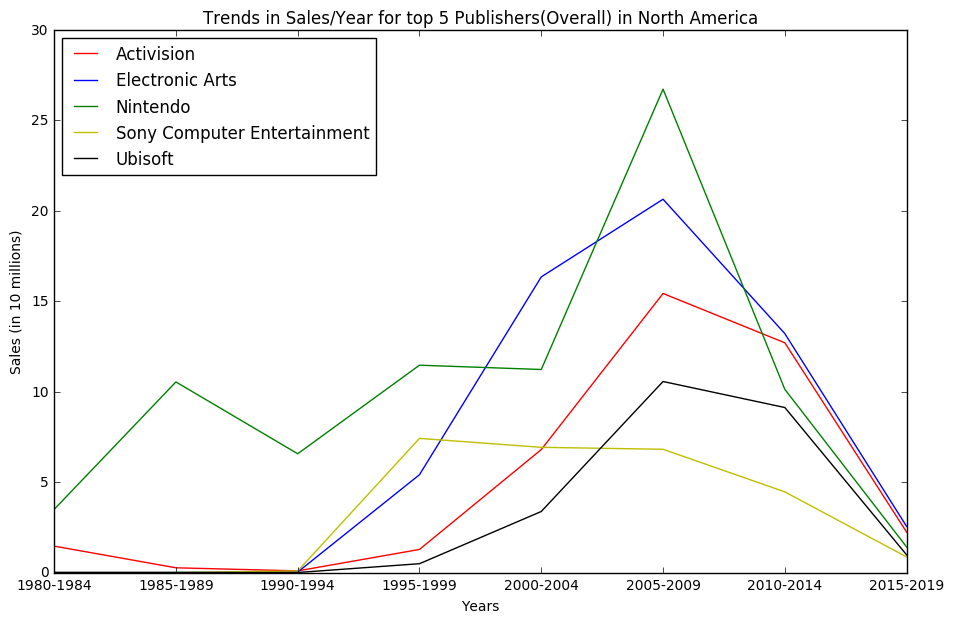

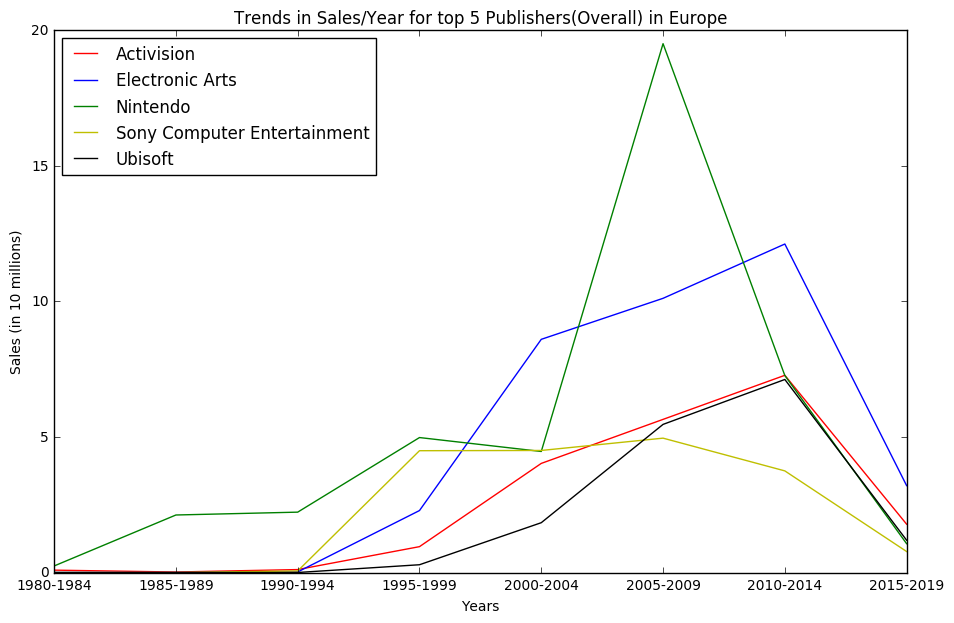

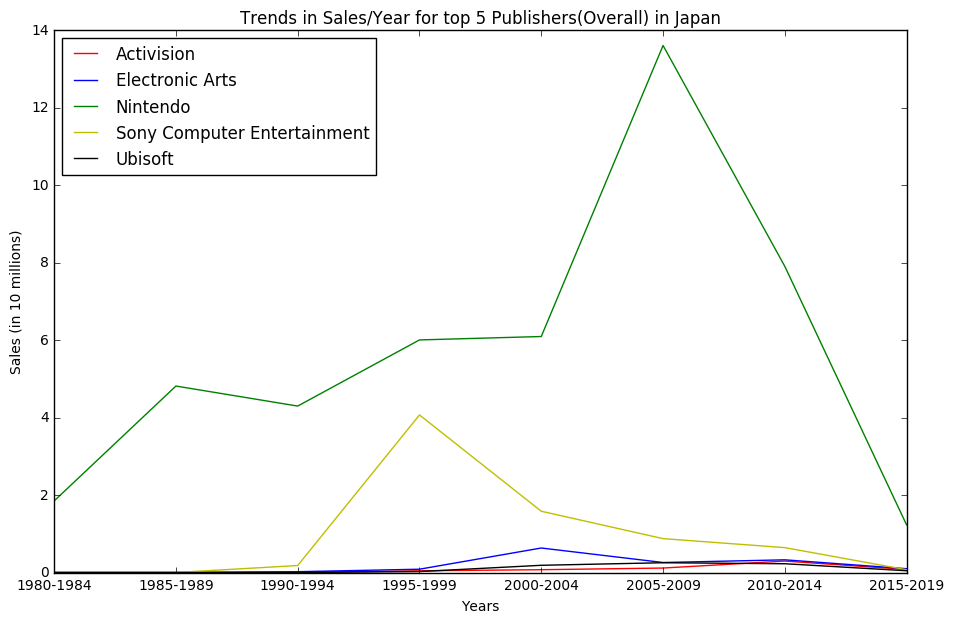

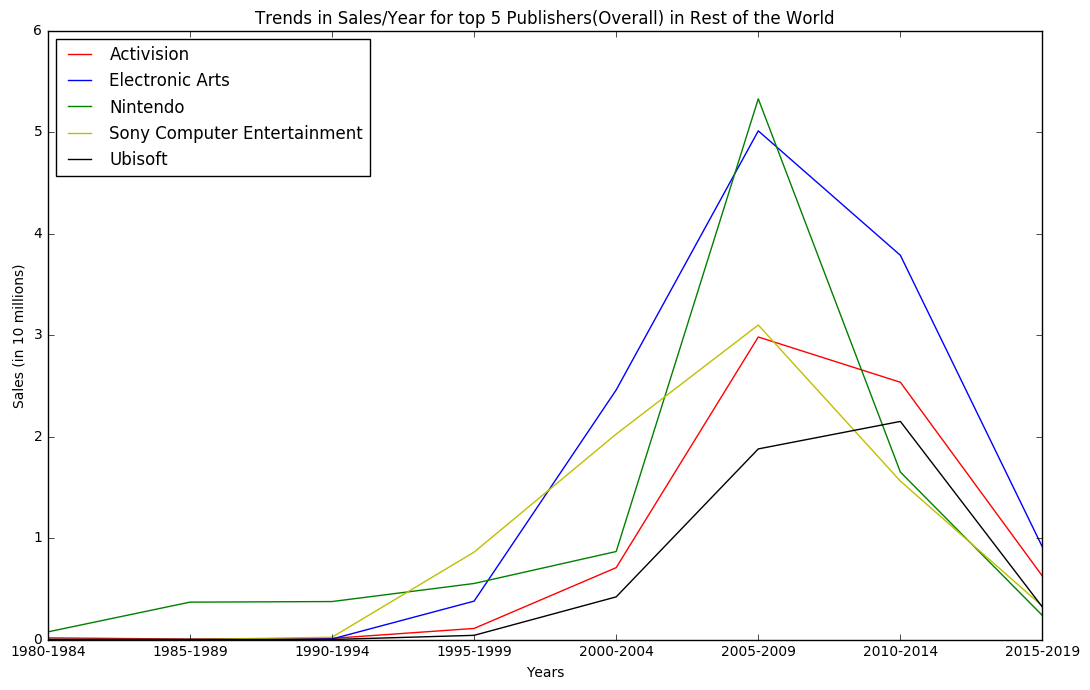

In [37]:
NA_Trends = {}
EU_Trends = {}
Other_Trends = {}
JP_Trends = {}

for publisher, val in ToppublishersbyGlobalSales[:5]:
    NA_Trends[publisher] = {}
    EU_Trends[publisher] = {}
    JP_Trends[publisher] = {}
    Other_Trends[publisher] = {}
    for game in games.keys():
        total_games = 1
        i=0
        if len(games[game]) > 16:
            total_games = int(len(games[game])/16)
        while i < total_games:
                if publisher == games[game][(16*i + 4)]:
                    year = games[game][(16*i + 2)]
                    if year != 'N/A':
                        if year not in NA_Trends[publisher].keys():
                            NA_Trends[publisher][year] = 0.00
                            EU_Trends[publisher][year] = 0.00
                            JP_Trends[publisher][year] = 0.00
                            Other_Trends[publisher][year] = 0.00     
                        NA_Trends[publisher][year] += float(games[game][(16*i+5)])
                        EU_Trends[publisher][year] += float(games[game][(16*i+6)])
                        JP_Trends[publisher][year] += float(games[game][(16*i+7)])
                        Other_Trends[publisher][year] += float(games[game][(16*i+8)])
                i = i + 1   

plotGraph(NA_Trends,EU_Trends,JP_Trends,Other_Trends)
    
    